# Convolutional Neural Network

In [46]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers

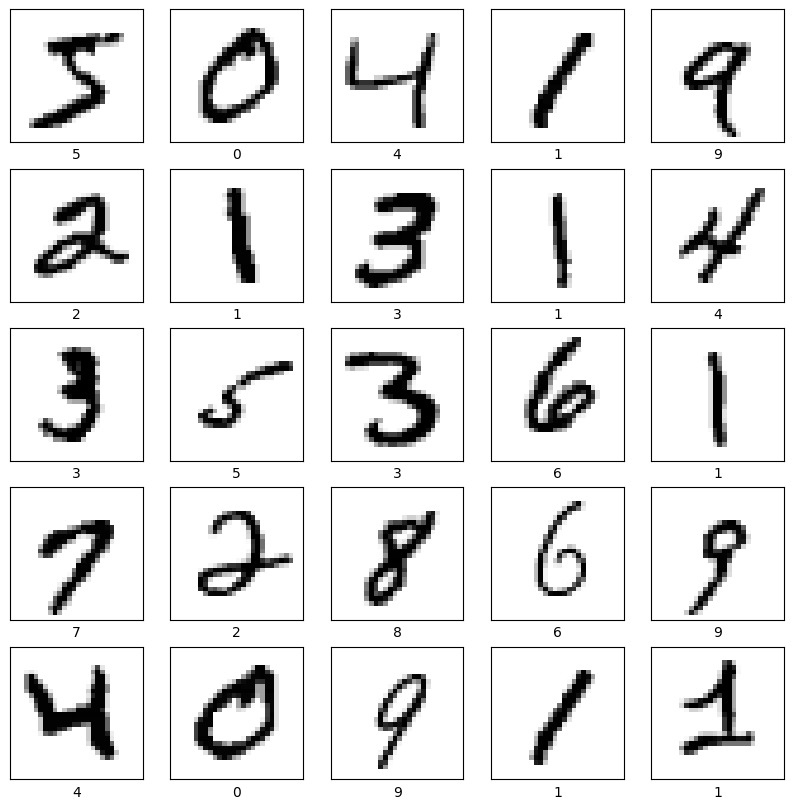

In [47]:
# loading the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Display sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.grid(False)
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [48]:
print(f"We have {X_train.shape[0]} training samples and {X_test.shape[0]} test samples")
print(f"Each image is of size {X_train.shape[1:]}")

We have 60000 training samples and 10000 test samples
Each image is of size (28, 28)


In [49]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

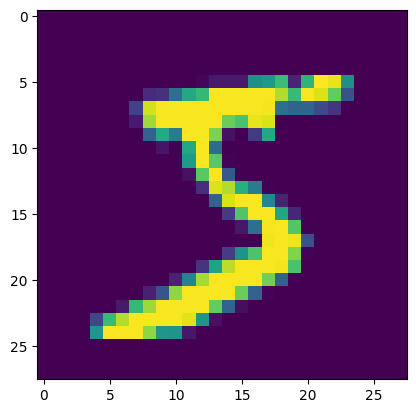

In [50]:
plt.imshow(X_train[0])

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

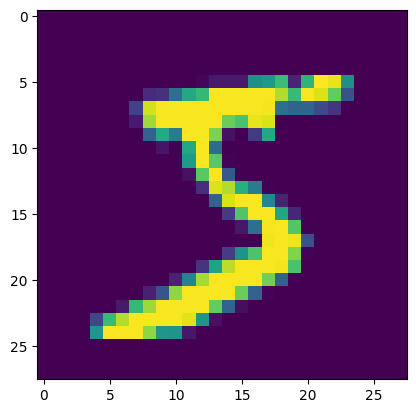

In [51]:
# print the image and pixel matrix

plt.imshow(X_train[0])

for row in X_train[0]:
    for pixel in row:
        print('{:3}'.format(pixel), end=" ")
    print()

In [52]:
# normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# change data type to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# print the pixel matrix
for row in X_train[0]:
    for pixel in row:
        print("{:0.3f}".format(pixel), end=" ")
    print()

# reshape the data as we dont have 3rd value of an image
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train.shape, X_test.shape

0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.071 0.071 0.071 0.494 0.533 0.686 0.102 0.651 1.000 0.969 0.498 0.000 0.000

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
# Create a simple CNN model 
input_layer = layers.Input(shape=(28, 28, 1)) # 28x28 image with 1 channel

# model creation
model = tf.keras.Sequential([
    input_layer, # input layer
    layers.Conv2D(filters = 10, kernel_size = (3, 3), activation='relu'), # convolutional layer
    layers.Conv2D(filters = 10, kernel_size = (3, 3), activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    layers.Conv2D(filters = 10, kernel_size = (3, 3), activation='relu'), # convolutional layer
    layers.Conv2D(filters = 10, kernel_size = (3, 3), activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    layers.Flatten(), # flatten layer
    layers.Dense(10, activation='softmax'), # dense laye
])

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 10)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 10)         0         
 2D)                                                  

In [59]:
# compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [60]:
# train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 100s 26ms/step - loss: 0.3847 - accuracy: 0.8757 - val_loss: 0.1485 - val_accuracy: 0.9578
Epoch 2/10
750/750 [==============================] - 14s 19ms/step - loss: 0.1193 - accuracy: 0.9627 - val_loss: 0.0970 - val_accuracy: 0.9713
Epoch 3/10
750/750 [==============================] - 15s 20ms/step - loss: 0.0906 - accuracy: 0.9716 - val_loss: 0.0779 - val_accuracy: 0.9767
Epoch 4/10
750/750 [==============================] - 16s 21ms/step - loss: 0.0720 - accuracy: 0.9776 - val_loss: 0.0714 - val_accuracy: 0.9787
Epoch 5/10
750/750 [==============================] - 14s 19ms/step - loss: 0.0634 - accuracy: 0.9803 - val_loss: 0.0676 - val_accuracy: 0.9783
Epoch 6/10
750/750 [==============================] - 12s 17ms/step - loss: 0.0568 - accuracy: 0.9822 - val_loss: 0.0634 - val_accuracy: 0.9808
Epoch 7/10
750/750 [==============================] - 11s 15ms/step - loss: 0.0517 - accuracy: 0.9839 - val_loss: 0.0619 - val_accuracy